In [1]:
import eos
import numpy as np

# Parameter Inference

## Listing the built-in Constraints

In [2]:
eos.Constraints(prefix='->D^+', name='BR')

Name,Type
B^0->D^+e^-nu::BRs@Belle-2015A,MultivariateGaussian<10> (using covariance matrix)
B^0->D^+mu^-nu::BRs@Belle-2015A,MultivariateGaussian<10> (using covariance matrix)


INFO:root:   plotting EOS observable "B->Dlnu::dBR/dq2;l=e,q=d"
/home/dvandyk/.eos/master/lib/python3.5/site-packages/eos/plot/plotter.py:390: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  constraint = yaml.load(entry.serialize())


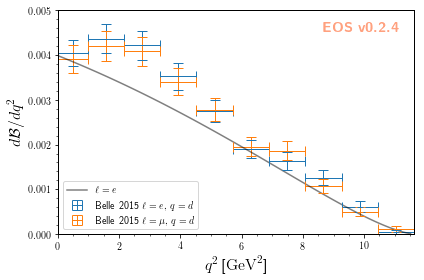

In [3]:
plot_args = {
    'plot': {
        'x': { 'label': r'$q^2$', 'unit': r'$\textnormal{GeV}^2$', 'range': [0.0, 11.63] },
        'y': { 'label': r'$d\mathcal{B}/dq^2$',                    'range': [0.0,  5e-3] },
        'legend': { 'location': 'lower left' }
    },
    'contents': [
        {
            'label': r'$\ell=e$',
            'type': 'observable',
            'observable': 'B->Dlnu::dBR/dq2;l=e,q=d',
            'kinematic': 'q2',
            'color': 'black',
            'range': [0.02, 11.63],
        },
        {
            'label': r'Belle 2015 $\ell=e,\, q=d$',
            'type': 'constraint',
            'color': 'C0',
            'constraints': 'B^0->D^+e^-nu::BRs@Belle-2015A',
            'observable': 'B->Dlnu::BR',
            'variable': 'q2',
            'rescale-by-width': False
        },
        {
            'label': r'Belle 2015 $\ell=\mu,\,q=d$',
            'type': 'constraint',
            'color': 'C1',
            'constraints': 'B^0->D^+mu^-nu::BRs@Belle-2015A',
            'observable': 'B->Dlnu::BR',
            'variable': 'q2',
            'rescale-by-width': False
        },
    ]
}
eos.plot.Plotter(plot_args).plot()

## Creating the Posterior

In [4]:
analysis_args = {
    'global_options': { 'form-factors': 'BSZ2015', 'model': 'CKMScan' },
    'priors': [
        { 'parameter': 'CKM::abs(V_cb)',           'min':  38e-3, 'max':  48e-3,  'type': 'uniform' },
        { 'parameter': 'B->D::alpha^f+_0@BSZ2015', 'min':  0.0,   'max':  1.0,    'type': 'uniform' },
        { 'parameter': 'B->D::alpha^f+_1@BSZ2015', 'min': -4.0,   'max': -1.0,    'type': 'uniform' },
        { 'parameter': 'B->D::alpha^f+_2@BSZ2015', 'min': +4.0,   'max': +6.0,    'type': 'uniform' },
        { 'parameter': 'B->D::alpha^f0_1@BSZ2015', 'min': -1.0,   'max': +2.0,    'type': 'uniform' },
        { 'parameter': 'B->D::alpha^f0_2@BSZ2015', 'min': -2.0,   'max':  0.0,    'type': 'uniform' }
    ],
    'likelihood': [
        'B->D::f_++f_0@HPQCD2015A',
        'B->D::f_++f_0@FNALMILC2015A',
        'B^0->D^+e^-nu::BRs@Belle-2015A',
        'B^0->D^+mu^-nu::BRs@Belle-2015A'
    ]
}
analysis = eos.Analysis(**analysis_args)
analysis.parameters['CKM::abs(V_cb)'].set(42.0e-3) # sensible starting value

In [5]:
bfp = analysis.optimize()
display(bfp, analysis.goodness_of_fit())

parameter,value
$|V_{cb}|$,0.0422
B->D::alpha^f+_0@BSZ2015,0.6668
B->D::alpha^f+_1@BSZ2015,-2.5347
B->D::alpha^f+_2@BSZ2015,4.8889
B->D::alpha^f0_1@BSZ2015,0.2603
B->D::alpha^f0_2@BSZ2015,-0.8591


In [6]:
e_q2values  = np.unique(np.concatenate((np.linspace(0.02,  1.00, 20), np.linspace(1.00, 11.60, 20))))
e_obs       = [eos.Observable.make(
                  'B->Dlnu::dBR/dq2', analysis.parameters, eos.Kinematics(q2=q2),
                  eos.Options(**{'form-factors': 'BSZ2015', 'l': 'e', 'q': 'd'}))
              for q2 in e_q2values]
parameter_samples, log_weights, e_samples  = analysis.sample(N=20000, stride=5, pre_N=1000, preruns=5, cov_scale=0.05, start_point=bfp.point, observables=e_obs)

INFO:root:Prerun 0 out of 5
INFO:root:Prerun 0: acceptance rate is   2%
INFO:root:Prerun 1 out of 5
INFO:root:Prerun 1: acceptance rate is  53%
INFO:root:Prerun 2 out of 5
INFO:root:Prerun 2: acceptance rate is  30%
INFO:root:Prerun 3 out of 5
INFO:root:Prerun 3: acceptance rate is  28%
INFO:root:Prerun 4 out of 5
INFO:root:Prerun 4: acceptance rate is  26%
INFO:root:Main run: started ...
INFO:root:Main run: acceptance rate is  26%


/home/dvandyk/.eos/master/lib/python3.5/site-packages/eos/plot/plotter.py:390: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  constraint = yaml.load(entry.serialize())


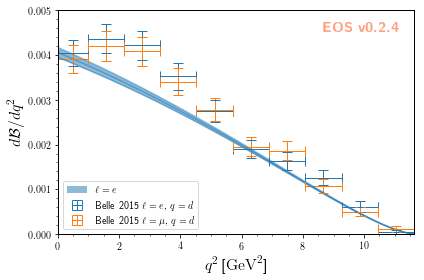

In [7]:
plot_args = {
    'plot': {
        'x': { 'label': r'$q^2$', 'unit': r'$\textnormal{GeV}^2$', 'range': [0.0, 11.63] },
        'y': { 'label': r'$d\mathcal{B}/dq^2$',                    'range': [0.0,  5e-3] },
        'legend': { 'location': 'lower left' }
    },
    'contents': [
        {
          'label': r'$\ell=e$', 'type': 'uncertainty', 'range': [0.02, 11.60],
          'data': { 'samples': e_samples, 'xvalues': e_q2values }
        },
        {
            'label': r'Belle 2015 $\ell=e,\, q=d$',
            'type': 'constraint',
            'color': 'C0',
            'constraints': 'B^0->D^+e^-nu::BRs@Belle-2015A',
            'observable': 'B->Dlnu::BR',
            'variable': 'q2',
            'rescale-by-width': False
        },
        {
            'label': r'Belle 2015 $\ell=\mu,\,q=d$',
            'type': 'constraint',
            'color': 'C1',
            'constraints': 'B^0->D^+mu^-nu::BRs@Belle-2015A',
            'observable': 'B->Dlnu::BR',
            'variable': 'q2',
            'rescale-by-width': False
        },
    ]
}
eos.plot.Plotter(plot_args).plot()

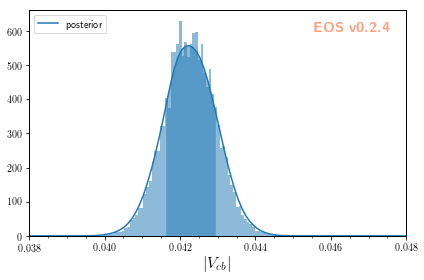

In [8]:
plot_args = {
    'plot': {
        'x': { 'label': r'$|V_{cb}|$', 'range': [38e-3, 48e-3] },
        'legend': { 'location': 'upper left' }
    },
    'contents': [
        {
            'type': 'histogram',
            'data': { 'samples': parameter_samples[:, 0], 'log_weights': log_weights }
        },
        {
            'type': 'kde', 'color': 'C0', 'label': 'posterior', 'bandwidth': 2,
            'range': [40e-3, 45e-3],
            'data': { 'samples': parameter_samples[:, 0], 'log_weights': log_weights }
        }
    ]
}
eos.plot.Plotter(plot_args).plot()

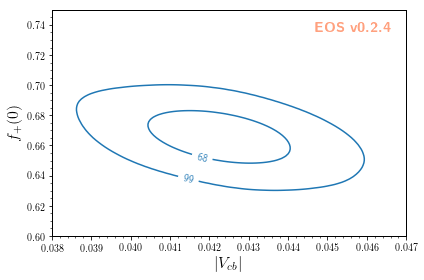

In [9]:
plot_args = {
    'plot': {
        'x': { 'label': r'$|V_{cb}|$', 'range': [38e-3, 47e-3] },
        'y': { 'label': r'$f_+(0)$', 'range': [0.6, 0.75] },
    },
    'contents': [
        {
            'type': 'kde2D', 'color': 'C0', 'label': 'posterior', 'bandwidth': 3,
            'range': [40e-3, 45e-3], 'levels': [68, 99],
            'data': { 'samples': parameter_samples[::10, (0,1)], 'log_weights': log_weights[::10] }
        }
    ]
}
eos.plot.Plotter(plot_args).plot()

In [10]:
print('$|V_{{cb}}|$ = {mean:.4f} +/- {std:.4f}'.format(
    mean=np.average(parameter_samples[:,0], weights=np.exp(log_weights)),
    std=np.sqrt(np.var(parameter_samples[:, 0]))
))

$|V_{cb}|$ = 0.0423 +/- 0.0009
